1. Introduction

In [ ]:
# Goal: Predict customer churn based on demographics, services, and account info
# Dataset: Telco Customer Churn (Kaggle)
# Libraries: pandas, numpy, matplotlib, seaborn, scikit-learn

2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

3. Load Dataset

In [6]:
data_path = r"C:\Users\Cooper\Downloads\Telco-Customer-Churn.csv"  # place dataset here
df = pd.read_csv(data_path)

# Preview data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


4. Data Cleaning

In [7]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [8]:
# Check missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Convert TotalCharges to numeric (some datasets have spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Cooper\AppData\Local\Temp\ipykernel_6128\3173537658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


5. Exploratory Data Analysis

C:\Users\Cooper\AppData\Local\Temp\ipykernel_6128\3887400371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="Set2")


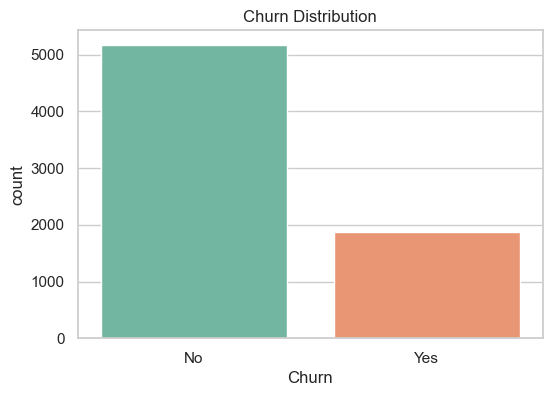

In [10]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

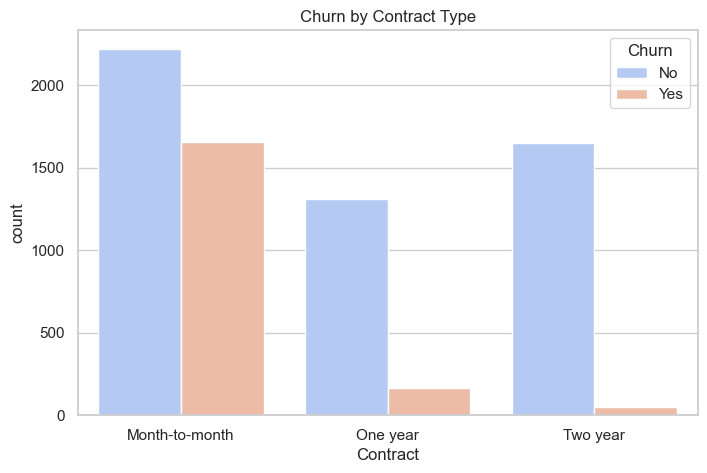

In [11]:
# Churn by Contract Type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df, palette="coolwarm")
plt.title("Churn by Contract Type")
plt.show()

6. Feature Encoding

In [12]:
# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

7. Feature Scaling

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Churn', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns.drop('Churn'))
y = df['Churn']

8. Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

9. Model Building

In [15]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [17]:
# Random Forest with Hyperparameter Tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Best Random Forest Params:", grid_search.best_params_)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



10. ROC Curve & AUC

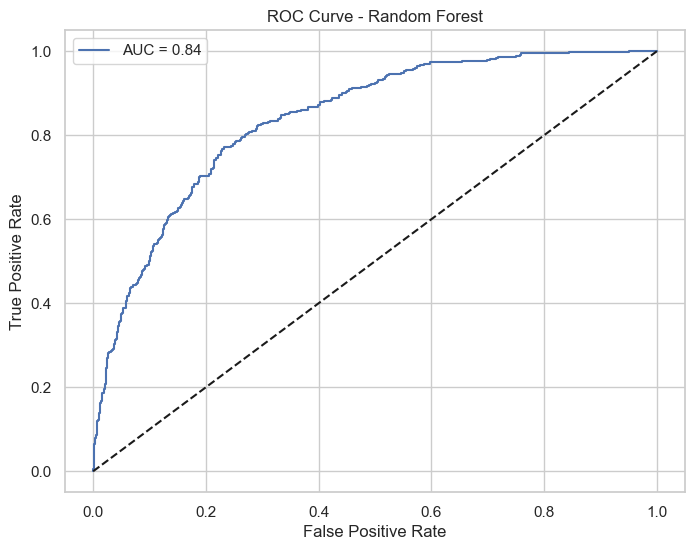

In [18]:
y_proba = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

11. Cross-Validation

In [19]:
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy: 0.80
